In [24]:
from pathlib import Path
import gensim
import mongoConnection
import matplotlib.pyplot as plt
import numpy as np

# Loading dictionnaries from path

In [7]:
# Checking if a dictionnary already exists or not
my_file_title = Path("dict/title/title.dict")
my_file_body = Path("dict/body/body.dict")

if not(my_file_body.exists()):
    print("Do not exist")
    gensim.corpora.Dictionary().save(str(my_file_body))
if not(my_file_title.exists()):
    gensim.corpora.Dictionary().save(str(my_file_title))

# Printing dictionnaries

In [25]:
# Loading dictionnaries from the disk
dict_title = gensim.corpora.Dictionary()
dict_title = dict_title.load(str(my_file_title))
dict_body = gensim.corpora.Dictionary()
dict_body = dict_body.load(str(my_file_body))

print(len(list(dict_title.items())))
print(len(list(dict_body.items())))

55014
42917


In [7]:
import pickle

"""
Retrieving word count from mongodb and registering it in a list for easier processing
"""

mongoCo = mongoConnection.connectToMongo(ignore_unicode_error=True)
mongoDb = mongoCo.tensor_exp
mongoColl = mongoDb.body_word_count
documentList = list(mongoColl.find())
docTextList = []

for index, document in enumerate(documentList):
    if index % 1000 == 0:
        print("\n##### Processing batch number " + str(index) + " #####\n")
    
    if len(documentList) == 0:
        print("Nothing to do here")
        exit()
    
    word_string = str(document["_id"])
    word_count = document["value"]
    
    docTextList.append((word_string, word_count))

"""
Saving the list of words
"""

with open("lists/body/full.txt", "wb") as fp:   #Pickling
    pickle.dump(docTextList, fp)
    


##### Processing batch number 0 #####


##### Processing batch number 1000 #####


##### Processing batch number 2000 #####


##### Processing batch number 3000 #####


##### Processing batch number 4000 #####


##### Processing batch number 5000 #####


##### Processing batch number 6000 #####


##### Processing batch number 7000 #####


##### Processing batch number 8000 #####


##### Processing batch number 9000 #####


##### Processing batch number 10000 #####


##### Processing batch number 11000 #####


##### Processing batch number 12000 #####


##### Processing batch number 13000 #####


##### Processing batch number 14000 #####


##### Processing batch number 15000 #####


##### Processing batch number 16000 #####


##### Processing batch number 17000 #####


##### Processing batch number 18000 #####


##### Processing batch number 19000 #####


##### Processing batch number 20000 #####


##### Processing batch number 21000 #####


##### Processing batch number 22000 #####




## Counting words

The functions below extract word count from the pickle file that we created before and plot their occurences.

After plotting we can see that there is a lot of words appearing only between once an dfive times in our corpus. Then, let's delete those words and keep olnly the relevant ones.

The second graph shows that after deleting non-relevant words, the resulting dictionnary is much more balanced

In [41]:
"""
Plotting word occurences
"""
def plot_word_occurences(list_of_words):
    lessThanFive = FiveToTen = TenToFifty = FiftyToHundred = HundredToThousand = MoreThanThousand = 0
    for tuples in list_of_words:
        if tuples[1] < 5:
            lessThanFive +=1
        elif tuples[1] < 10:
            FiveToTen += 1
        elif tuples[1] < 50:
            TenToFifty += 1
        elif tuples[1] < 100:
            FiftyToHundred +=1
        elif tuples[1] < 1000:
            HundredToThousand +=1
        else:
            MoreThanThousand += 1
    
    values = [lessThanFive, FiveToTen, TenToFifty, FiftyToHundred, HundredToThousand, MoreThanThousand]
    
    n_groups = len(values)
    
    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    
    rects = ax.bar(index, values, bar_width,
                alpha=opacity, color='r', error_kw=error_config)
    
    
    ax.set_xticklabels(('0-5', '5-10', '10-50', '50-100', '100-1000', '1000+'))
    
    ax.set_xticks(index)
    plt.show()

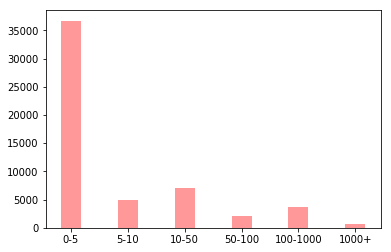

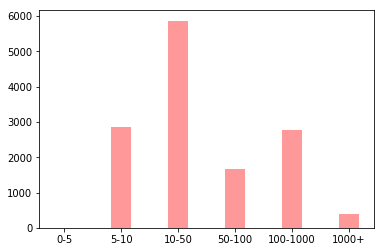

In [40]:
"""
Opening list of words for further processing and deleting non-relevant words
"""

title_relevant_words = []

with open("lists/title/full.txt", "rb") as fp:
    title_test = pickle.load(fp)
    
    # Going through the list of words and keeping those which appear at least 5 times in the corpus
    for tuples in test:
        if tuples[1] > 5.0:
            title_relevant_words.append(tuples)
    plot_word_occurences(title_test)
    plot_word_occurences(title_relevant_words)   
    

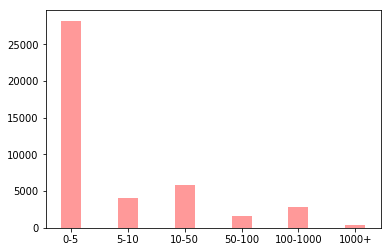

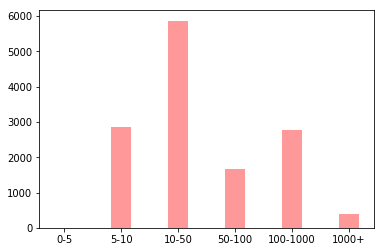

In [39]:
"""
Same thing with the body
"""

body_relevant_words = []

with open("lists/body/full.txt", "rb") as fp:
    body_test = pickle.load(fp)
    
    # Going through the list of words and keeping those which appear at least 5 times in the corpus
    for tuples in test:
        if tuples[1] > 5.0:
            body_relevant_words.append(tuples)
    plot_word_occurences(body_test)
    plot_word_occurences(body_relevant_words)